In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('/Users/sonamchoki/Desktop/PRJ303/seattle_weatherj.csv')
df.head()



date  precipitation  temp_max  temp_min  wind weather
0  1/1/12            0.0      12.8       5.0   4.7    snow
1  1/2/12           10.9      10.6       2.8   4.5    rain
2  1/3/12            0.8      11.7       7.2   2.3    rain
3  1/4/12           20.3      12.2       5.6   4.7    rain
4  1/5/12            1.3       8.9       2.8   6.1    rain

In [3]:
df = df.set_index('date')
df.head()

precipitation  temp_max  temp_min  wind weather
date                                                   
1/1/12            0.0      12.8       5.0   4.7    snow
1/2/12           10.9      10.6       2.8   4.5    rain
1/3/12            0.8      11.7       7.2   2.3    rain
1/4/12           20.3      12.2       5.6   4.7    rain
1/5/12            1.3       8.9       2.8   6.1    rain

In [4]:
df.weather.value_counts()

rain    641
sun     640
fog     134
snow     46
Name: weather, dtype: int64

In [5]:
np.unique(df.weather)

array(['fog', 'rain', 'snow', 'sun'], dtype=object)

In [6]:
df.shape

(1461, 5)

In [7]:
df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
df.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [9]:
df.count()

precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [10]:
np.unique(df.weather)

array(['fog', 'rain', 'snow', 'sun'], dtype=object)

In [11]:
df['weather'].value_counts()

rain    641
sun     640
fog     134
snow     46
Name: weather, dtype: int64

### Outlier

<AxesSubplot:xlabel='precipitation'>

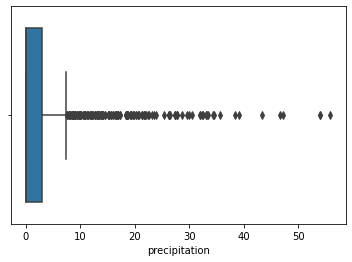

In [12]:
sns.boxplot(x=df['precipitation'])

In [13]:
Q1 = df.precipitation.quantile(0.25)
Q3 = df.precipitation.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print(upperlimit,lowerlimit)

7.5 -4.5


In [14]:
df[(df.precipitation < lowerlimit)  | (df.precipitation > upperlimit)]

precipitation  temp_max  temp_min  wind weather
date                                                     
1/2/12             10.9      10.6       2.8   4.5    rain
1/4/12             20.3      12.2       5.6   4.7    rain
1/17/12             8.1       3.3       0.0   5.6    snow
1/18/12            19.8       0.0      -2.8   5.0    snow
1/19/12            15.2      -1.1      -2.8   1.6    snow
...                 ...       ...       ...   ...     ...
12/12/15           16.0       8.9       5.6   5.6    rain
12/17/15           21.8       6.7       3.9   6.0    rain
12/18/15           18.5       8.9       4.4   5.1    rain
12/21/15           27.4       5.6       2.8   4.3    rain
12/27/15            8.6       4.4       1.7   2.9    rain

[199 rows x 5 columns]

In [15]:
df = df[(df.precipitation > lowerlimit) & (df.precipitation < upperlimit)]
df.shape

(1262, 5)

<AxesSubplot:xlabel='precipitation'>

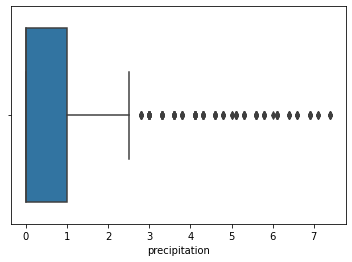

In [16]:
sns.boxplot(x=df['precipitation'])

<AxesSubplot:xlabel='temp_max'>

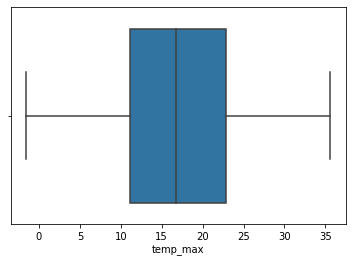

In [17]:
sns.boxplot(x=df['temp_max'])

<AxesSubplot:xlabel='temp_min'>

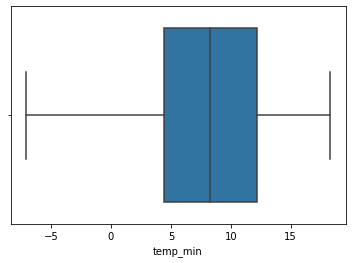

In [18]:
sns.boxplot(x=df['temp_min'])

<AxesSubplot:xlabel='wind'>

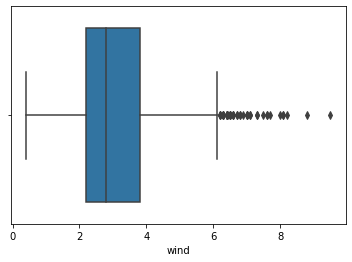

In [19]:
sns.boxplot(x=df['wind'])

In [20]:
Q1 = df.wind.quantile(0.25)
Q3 = df.wind.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print(upperlimit,lowerlimit)

6.199999999999999 -0.1999999999999993


In [21]:
df[(df.wind < lowerlimit)  | (df.wind > upperlimit)]

precipitation  temp_max  temp_min  wind weather
date                                                     
1/21/12             3.0       8.3       3.3   8.2    rain
2/18/12             6.4       6.7       3.9   8.1    rain
2/21/12             0.8      10.0       7.8   7.5    rain
2/25/12             0.0       7.2       2.8   6.4    rain
2/29/12             0.8       5.0       1.1   7.0    snow
3/3/12              0.0      12.2       6.7   7.0     sun
3/5/12              6.9       7.8       1.1   6.2    rain
3/20/12             3.6       7.8       2.2   6.4    rain
4/1/12              1.5       8.9       4.4   6.8    rain
4/30/12             4.3      12.8       7.2   8.0    rain
5/1/12              0.5      11.7       6.1   6.4    rain
5/23/12             0.3      14.4       8.9   6.3    rain
6/17/12             0.0      18.9      11.7   6.4     sun
10/3/12             0.0      18.9       7.8   7.3     sun
10/4/12             0.0      18.9       8.3   6.5     sun
12/17/12            2.0       8.3       1.7   9.5    rain
1/7/13              2.3      10.0       4.4   7.3    rain
2/21/13             0.5       6.7       3.9   6.2    rain
2/25/13             2.3      10.6       3.3   7.1    rain
3/16/13             4.3      10.6       4.4   6.4    rain
5/4/13              0.0      25.0      11.1   6.5     sun
10/7/13             0.5      16.1      11.7   6.3    rain
12/1/13             3.0      13.3       7.8   8.8    rain
1/9/14              5.8       9.4       5.6   6.3    rain
1/10/14             4.3      12.8       8.3   7.0    rain
1/12/14             1.5      11.1       5.6   8.1    rain
1/13/14             0.0      10.6      10.0   7.1     sun
1/30/14             0.0       8.3       6.1   6.4     sun
2/5/14              0.0      -0.5      -5.5   6.6     sun
2/12/14             4.6      12.2       7.2   6.4    rain
2/13/14             1.8      12.8       7.8   6.3    rain
2/20/14             3.0      10.0       5.6   6.9    rain
3/6/14              3.0      13.3      10.0   6.2    rain
9/5/14              0.0      27.8      13.9   6.5     fog
11/6/14             4.1      16.7      10.6   6.7    rain
11/11/14            0.0       7.8       1.1   7.7     sun
11/12/14            0.0       6.7       0.0   7.6     sun
11/27/14            3.3      14.4      11.7   6.6    rain
12/11/14            6.9      14.4       8.3   6.4    rain
2/16/15             0.0      15.0       5.6   6.6     fog
4/11/15             0.0      11.7       5.6   6.5     sun
9/20/15             4.1      22.8      12.2   6.8    rain
12/20/15            4.3       7.8       4.4   6.7    rain
12/23/15            6.1       5.0       2.8   7.6    rain

In [22]:
df = df[(df.wind > lowerlimit) & (df.wind < upperlimit)]
df.shape

(1218, 5)

<AxesSubplot:xlabel='wind'>

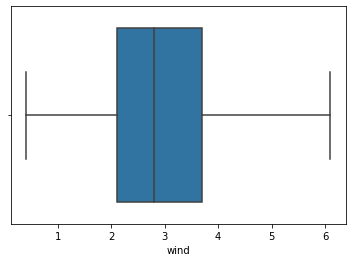

In [23]:
sns.boxplot(x=df['wind'])

### Train Test Split

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.3, random_state=5)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [27]:
n_cols=X.select_dtypes(include =['int64', 'float64']).columns
n_cols

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')

In [28]:
n_index = [X.columns.get_loc(col) for col in n_cols]
n_index

[0, 1, 2, 3]

In [29]:
n_transformer = Pipeline(steps = 
                        [
                            ('scale', StandardScaler())
                        ])

In [30]:
pre = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,n_index)
                           
                       ])

### Train the model

### Using LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
Logre = LogisticRegression()

In [33]:
from sklearn import set_config
set_config(display='diagram')
lrmodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('est',Logre)
                  ])

In [34]:
lrmodel.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('est', LogisticRegression())])

In [35]:
lrmodel.score(xtrain, ytrain)

0.7992957746478874

In [36]:
lrmodel.score(xtest, ytest)

0.8142076502732241

### Evaluation of Metrics

In [37]:
#snowtest = [3.6,6.7,-0.6,4.2] 
#test = [0,9.4,1.7,3.8] 
#y_hat = lrmodel.predict(np.reshape(test,(1,-1)))
y_hat = lrmodel.predict(xtest)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_hat)

0.8142076502732241

In [39]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ytest,y_hat)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_hat))

              precision    recall  f1-score   support

         fog       0.00      0.00      0.00        33
        rain       0.92      0.85      0.88       134
        snow       0.00      0.00      0.00        11
         sun       0.77      0.98      0.86       188

    accuracy                           0.81       366
   macro avg       0.42      0.46      0.44       366
weighted avg       0.73      0.81      0.77       366



/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(ytest, y_hat, average ='micro'))

0.8142076502732241


In [42]:
print(recall_score(ytest, y_hat, average ='micro'))

0.8142076502732241


In [43]:
from sklearn.metrics import f1_score
print(f1_score(ytest, y_hat, average ='micro'))

0.8142076502732241


Text(111.5, 0.5, 'Truth')

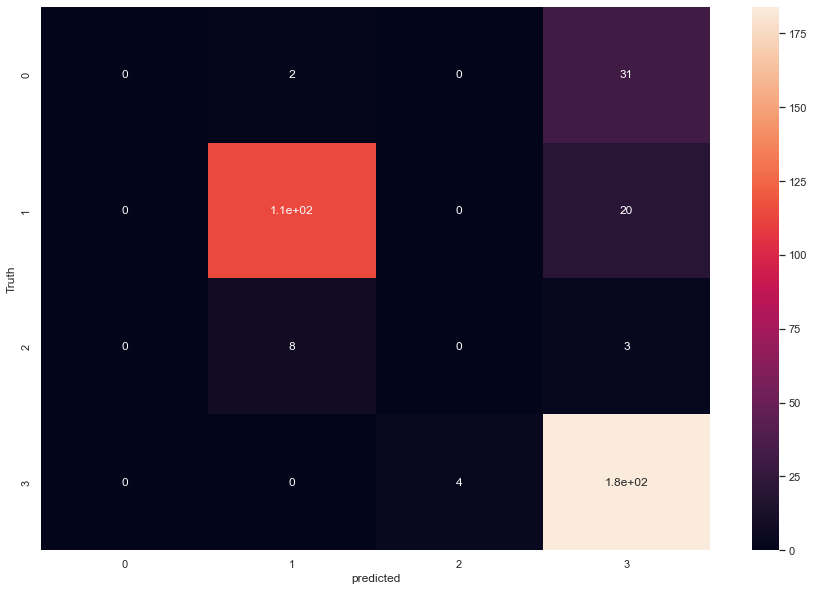

In [44]:
matrix = confusion_matrix(ytest, y_hat)
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

### Using RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
RF = RandomForestClassifier(n_estimators= 30,min_samples_leaf=2)

In [47]:
from sklearn import set_config
set_config(display='diagram')
RFmodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('est',RF)
                  ])

In [48]:
RFmodel.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('est',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=30))])

In [49]:
RFmodel.score(xtrain,ytrain)

0.9084507042253521

In [50]:
RFmodel.score(xtest,ytest)

0.8469945355191257

### Evaluation of Metrics

In [51]:
#raintest = [3.6,6.7,-0.6,4.2]  
#snowtest = [1,6.1,-3,4.2] 
#fogtest = [0,15,3.9,4]
#y_hat = RFmodel.predict(np.reshape(fogtest,(1,-1)))
#y_hat
y_hat = RFmodel.predict(xtest)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_hat)

0.8469945355191257

In [53]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(ytest,y_hat)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_hat))

              precision    recall  f1-score   support

         fog       0.22      0.12      0.16        33
        rain       0.98      0.90      0.94       134
        snow       1.00      0.73      0.84        11
         sun       0.82      0.94      0.87       188

    accuracy                           0.85       366
   macro avg       0.76      0.67      0.70       366
weighted avg       0.83      0.85      0.83       366



In [55]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(ytest, y_hat, average ='micro'))

0.8469945355191257


In [56]:
print(recall_score(ytest, y_hat, average ='micro'))

0.8469945355191257


In [57]:
from sklearn.metrics import f1_score
print(f1_score(ytest, y_hat, average ='micro'))

0.8469945355191257


Text(111.5, 0.5, 'Truth')

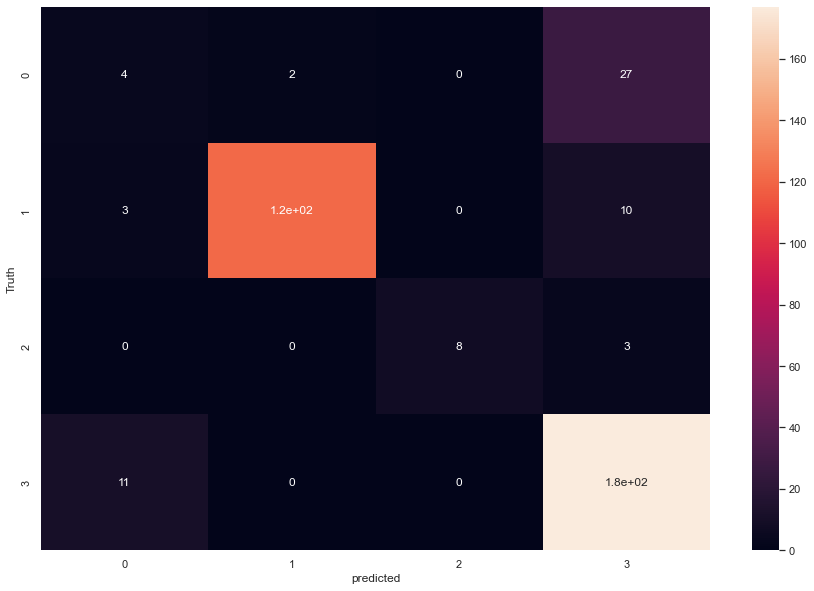

In [58]:
matrix = confusion_matrix(ytest, y_hat)
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

### Using KNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors = 100, metric = 'minkowski', p = 2)

In [61]:
from sklearn import set_config
set_config(display='diagram')
knnmodel = Pipeline(steps = 
                  [
                      ('preprocessing',pre),
                      ('est',knn)
                  ])

In [62]:
knnmodel.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('est', KNeighborsClassifier(n_neighbors=100))])

In [63]:
knnmodel.score(xtrain,ytrain)

0.7206572769953051

In [64]:
knnmodel.score(xtest,ytest)

0.7431693989071039

### Evaluation of Metrics

In [65]:
y_hat = knn.predict(xtest)

In [66]:
accuracy_score(ytest,y_hat)

0.5245901639344263

In [67]:
print(classification_report(ytest, y_hat))

              precision    recall  f1-score   support

         fog       0.00      0.00      0.00        33
        rain       0.44      0.03      0.06       134
        snow       0.00      0.00      0.00        11
         sun       0.53      1.00      0.69       188

    accuracy                           0.52       366
   macro avg       0.24      0.26      0.19       366
weighted avg       0.43      0.52      0.37       366



/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sonamchoki/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
print(precision_score(ytest, y_hat, average ='micro'))

0.5245901639344263


In [69]:
print(recall_score(ytest, y_hat, average ='micro'))

0.5245901639344263


In [70]:
print(f1_score(ytest, y_hat, average ='micro'))

0.5245901639344263


Text(111.5, 0.5, 'Truth')

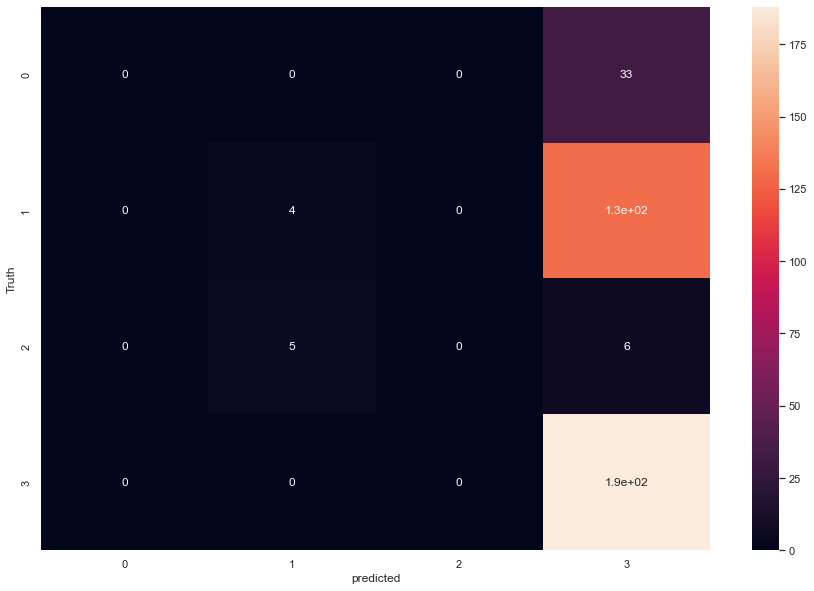

In [71]:
matrix = confusion_matrix(ytest, y_hat)
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

## Save and Load Model

In [72]:
import pickle
#pickle.dump(RFmodel, open("weatherpickle.pkl","wb"))

In [73]:
model = pickle.load(open("weatherpickle.pkl","rb"))
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('est',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=30))])